In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('C:/Users/UserK/Desktop/google-data/category_rank.csv', index_col = 0)

In [82]:
df

,Category,App Count,Total Installs,Mean Installs,Count Rank,Total Ins Rank,Mean Ins Rank
0,Game,53724,128349714530,2.389057e+06,1,1,7
1,Tools,19686,82510479341,4.191328e+06,4,2,4
2,Communication,5725,46183798625,8.067039e+06,14,3,1
3,Productivity,6960,30239553003,4.344763e+06,12,4,3
4,Entertainment,21076,20655335842,9.800406e+05,2,5,12
5,Video Players & Editors,3509,20205766195,5.758269e+06,19,6,2
6,Photography,7608,19390390537,2.548684e+06,11,7,6
7,Social,5018,19234942878,3.833189e+06,17,8,5
8,Music & Audio,13865,12251117178,8.836002e+05,6,9,13
9,Personalization,16275,10950866677,6.728643e+05,5,10,17


### 에디터 분석 페이지에 넣을 만한 것

##### 1. 이미 메인으로 점유하고 있는 어플이 있는 카테고리 
        1) 평균 설치수가 적고, 전체 설치수가 많은 카테고리의 분석을 그래프로 보여준다.
        2) 해당 카테고리별로 전체 설치가 1위인 어플을 보여준다.
        
         - 제공하고자 하는 결과 
          -> 그래프를 보여줌으로써 이 어플이 해당 카테고리에서 얼만큼의 점유를 하고있는지 개발자가 대략적으로 파악할 수 있도록 한다.
          

##### 2. 레드오션인 카테고리
        1) 카테고리별 어플 개수가 많고, 전체 설치수가 적은 카테고리의 분석을 그래프로 보여준다. 
        2) 해당 카테고리별로 전체 설치가 1위인 어플을 보여준다.

        - 제공하고자 하는 결과 
         -> 레드오션임에도 가장 잘 이용되고 있으며 모범이 되는 어플을 개발자가 참고할 수 있도록 한다.

          Category  App Count  Total Installs  Mean Installs  Count Rank  \
4    Entertainment      21076     20655335842         980040           2   
8    Music & Audio      13865     12251117178         883600           6   
9  Personalization      16275     10950866677         672864           5   

   Total Ins Rank  Mean Ins Rank  
4               5             12  
8               9             13  
9              10             17  
31.79050058652636
30.924170807894303
29.594458416763718
57.133841394995244


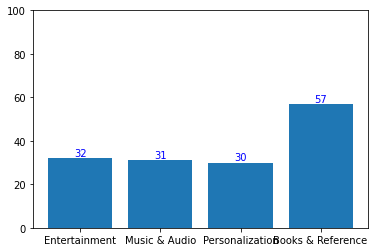

In [122]:
# 이미 메인 점유어플이 있는 카테고리 (평균설치下, 전체설치上)
# 1. Entertainment -> Google play games, Netflix, Hotstar
# 2. Music & Audio -> Youtube Music, Samsung Music, Mi Music
# 3. Personalization -> Samsung One UI Home, Themes, Wallpapers
# 4. Books & Reference -> Google Play Books, Amazon Kindle, 네이버 - NAVER	

top_ins = df['Total Ins Rank'] <= 10
bottom_mean = df['Mean Ins Rank'] > 10
is_focus = df[top_ins & bottom_mean]

df_main = pd.DataFrame(is_focus)
df_main['Mean Installs'] = df_main['Mean Installs'].astype(int)
print(df_main)
df_main = df_main.drop(['App Count', 'Count Rank', 'Total Ins Rank', 'Mean Ins Rank'], axis=1, inplace=True)
# print(df_main)
# 위의 세 카테고리마다 (점유율이 높은 세 어플의 설치수의 합 / 전체설치수*100)
# 1. Entertainment
print((4605543029+1437250170+523641463)/20655335842*100)
# 2. Music & Audio
print((1067343725+1065181427+862678090+793353160)/12251117178*100)
# 3. Personalization
print((2158959897+645246525+436643263)/10950866677*100)
# 4. Books & Reference
print((3202676731+373230108+96769732)/6428198212*100)


category = ['Entertainment','Music & Audio', 'Personalization', 'Books & Reference']
rate = [32, 31, 30, 57]

plt.bar(category, rate)
plt.ylim([0, 100])

for i, v in enumerate(category):
    plt.text(v, rate[i], rate[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom') 

plt.show()

In [113]:
# 레드오션인 카테고리 (전체설치下, 어플개수上)
# 1. Education -> Google Classroom, Samsung Global Goals, Photomath,
# 2. Lifestyle -> Pinterest, SmartThings, Tinder, Samsung Pay
# 3. Finance -> Paytm, CAIXA, Mercado Pago
# 4. Business -> ZOOM Cloud Meetings, Google Meet, Microsoft Teams, OfficeSuite

top_count = df['Count Rank'] <= 10
bottom_ins = df['Total Ins Rank'] > 12
is_red = df[top_count & bottom_ins]
print(is_red)

# Education
print((212017279+192681575+147356790)/5357551732*100)
# Lifestyle
print((615144909+573242377+277159841+242571447)/5888607104*100)
# Finance
print((300940960+114242985+71545694)/5351828911*100)
# Business
print((674196557+352581380+199799210+171561174)/4056226899*100)




     Category  App Count  Total Installs  Mean Installs  Count Rank  \
12  Lifestyle      10333      5888607104  569883.586954           8   
14  Education      20732      5357551732  258419.435269           3   
15    Finance      10254      5351828911  521925.971426           9   
17   Business       7719      4056226899  525486.060241          10   

    Total Ins Rank  Mean Ins Rank  
12              13             19  
14              15             30  
15              16             22  
17              18             21  
10.30425223339682
29.007175106651506
9.09464123562675
34.46893765594547


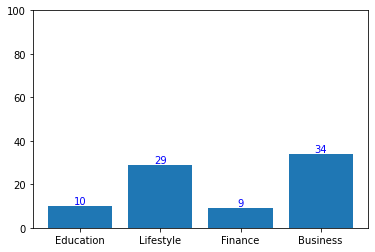

In [121]:

category1 = ['Education','Lifestyle', 'Finance', 'Business']
rate1 = [10, 29, 9, 34]

plt.bar(category1, rate1)
plt.ylim([0, 100])

for i, v in enumerate(category1):
    plt.text(v, rate1[i], rate1[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

#### 레드오션 그래프
레드오션인 카테고리의 상위권 어플의 점유율 파악하여 , 상위권의 점유율이 높을수록 더욱 진입하기 어렵다는 것 알려줌 